# 1\. Import Packages
---

In [1]:
# Code to install packages used. Uncomment to install.

# !pip3 install numpy
# !pip3 install pandas
# !pip3 install seaborn
# !pip3 install matplotlib
# !pip3 install scikit-learn

In [2]:
# Data visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Time, for time metrics
from time import time

# Model and preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report

# Unknown
# from astropy.table import Table

In [3]:
student_df = pd.read_csv('./student-data.csv', delimiter=',', encoding="utf-8-sig")

In [12]:
for col in student_df.columns:
    print(student_df[col].dtype)

object
object
int64
object
object
object
int64
int64
object
object
object
object
int64
int64
int64
object
object
object
object
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
object


In [4]:
student_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [13]:
student_df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [16]:
for col in student_df.columns:
        if (student_df[col].dtype == 'object' ) and col != 'passed':
            student_df3 = pd.get_dummies(student_df, columns=[col], prefix=[col])

student_df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [6]:
print(student_df.columns.tolist())
student_df.index.names

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']


FrozenList([None])

# 2\. Preprocessing

## 2.1 Encoding Categorical Values

---

Will come back to work further on this. Need to apply both on the actual dataset.

In [7]:
# Additional import to encode all non-numeric values
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# Select features to encode
categ = ['sex', 'address', 'schoolsup',
        'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic']


# Apply the encoding to the values
student_df[categ] = student_df[categ].apply(enc.fit_transform)

In [8]:
for col in categ:
  print(col, student_df[col].unique())

sex [0 1]
address [1 0]
schoolsup [1 0]
famsup [0 1]
paid [0 1]
activities [0 1]
nursery [1 0]
higher [1 0]
internet [0 1]
romantic [0 1]


In [9]:
student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,0,18,1,GT3,A,4,4,at_home,teacher,...,0,0,4,3,4,1,1,3,6,no
1,GP,0,17,1,GT3,T,1,1,at_home,other,...,1,0,5,3,3,1,1,3,4,no
2,GP,0,15,1,LE3,T,1,1,at_home,other,...,1,0,4,3,2,2,3,3,10,yes
3,GP,0,15,1,GT3,T,4,2,health,services,...,1,1,3,2,2,1,1,5,2,yes
4,GP,0,16,1,GT3,T,3,3,other,other,...,0,0,4,3,2,1,2,5,4,yes


In [10]:
# One-hot Encoding for nonbinary features
from sklearn.preprocessing import OneHotEncoder
oht = OneHotEncoder()

nb_categ = ['school', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']

encoded_features = oht.fit_transform(student_df[nb_categ])
student_df2 = pd.DataFrame(encoded_features.toarray(), columns = oht.get_feature_names_out(nb_categ))

# Drop original categorical colums from student_df
student_df.drop(nb_categ, axis = 1, inplace=True)

# Concatenate the one-hot encoded features with the original dataframe
student_df = pd.concat([student_df, student_df2], axis=1)

In [11]:
student_df.head()

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,4,4,2,2,0,1,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,17,1,1,1,1,2,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,15,1,1,1,1,2,3,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,15,1,4,2,1,3,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,16,1,3,3,1,2,0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
student_df.shape

(395, 47)

## 2.2 Detecting outliers


In [13]:
# Checking for missing values in the dataset
student_df.isnull().sum()

sex                  0
age                  0
address              0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
passed               0
school_GP            0
school_MS            0
famsize_GT3          0
famsize_LE3          0
Pstatus_A            0
Pstatus_T            0
Mjob_at_home         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_at_home         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_course        0
reason_home          0
reason_other         0
reason_repu

In [14]:
# Finding the numeric features
num_features = student_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_features)

['sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']


In [15]:
# Calculate the IQR for each feature
Q1 = student_df[num_features].quantile(0.25)
Q3 = student_df[num_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers for each feature
outliers = ((student_df[num_features] < (Q1 - 1.5 * IQR)) | (student_df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)
student_df[outliers]

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,4,4,2,2,0,1,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,17,1,1,1,1,2,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,15,1,1,1,1,2,3,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,15,1,4,2,1,3,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,16,1,3,3,1,2,0,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,2,2,1,2,2,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
391,1,17,1,3,1,2,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
392,1,21,0,1,1,1,1,3,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
393,1,18,0,3,2,3,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
# Aleternate code to detect outliers
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers)
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

outliers = detect_outliers(student_df, 2, ['age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])
student_df.iloc[outliers]


,sex,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
2,0,15,1,1,1,1,2,3,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0,17,1,4,4,2,2,0,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
18,1,17,1,3,2,1,1,3,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1,16,1,4,3,1,1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
25,0,16,1,2,2,1,1,2,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,19,0,2,3,1,3,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
389,0,18,1,1,1,2,2,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
390,1,20,1,2,2,1,2,2,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
391,1,17,1,3,1,2,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# # Showing distribution of data
# from scipy.stats import norm

# # select features to plot
# # features = num_features

# # Get the data for the features
# # data = student_df[num_features]

# # Plot a histogram of data with a normal PDF(Probability Density Function) overlaid
# for feature in num_features:
#   plt.hist(student_df[feature], density=True, bins=20)
#   xmin, xmax = plt.xlim()
#   x = np.linspace(xmin, xmax, 100)
#   mu, std = norm.fit(student_df[feature])
#   p = norm.pdf(x, mu, std)
#   plt.plot(x, p, 'k', linewidth=2)
#   title = "Fit results: mu = {:.2f}, std = {:.2f}".format(mu, std)
#   plt.title(feature + ':' + title)
#   plt.show()

## 2.3 Standardizing Values

In [18]:
# Import Scaler for standardization
from sklearn.preprocessing import StandardScaler

# Features to be scaled have already been found
#Scale the numeric features
scaler = StandardScaler()
student_df[num_features] = scaler.fit_transform(student_df[num_features])
student_df

,sex,age,address,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,-0.948176,1.023046,0.535392,1.143856,1.360371,0.792251,-0.042286,-0.449944,2.597133,-1.257656,...,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
1,-0.948176,0.238380,0.535392,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
2,-0.948176,-1.330954,0.535392,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,2.597133,-1.257656,...,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,3.157883,-0.601722,-0.543214,0.668496,-0.296908
3,-0.948176,-1.330954,0.535392,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-0.385040,0.795130,...,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
4,-0.948176,-0.546287,0.535392,0.229234,0.440257,-0.643249,-0.042286,-0.449944,-0.385040,0.795130,...,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,1.840894,-1.495896,-0.296908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.054656,2.592380,0.535392,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,-0.385040,0.795130,...,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
391,1.054656,0.238380,0.535392,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-0.385040,-1.257656,...,-1.104129,1.599549,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908
392,1.054656,3.377047,-1.867789,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,-0.385040,-1.257656,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,-1.495896,3.368048
393,1.054656,1.023046,-1.867789,0.229234,-0.479857,2.227751,-1.235351,-0.449944,-0.385040,-1.257656,...,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908


In [19]:
student_df['passed'] = student_df.pop('passed')

In [20]:
student_df.columns.tolist()

['sex',
 'age',
 'address',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_GP',
 'school_MS',
 'famsize_GT3',
 'famsize_LE3',
 'Pstatus_A',
 'Pstatus_T',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_father',
 'guardian_mother',
 'guardian_other',
 'passed']

# 3. Plots

Text(0.5, 1.0, 'Correlation Heatmap')

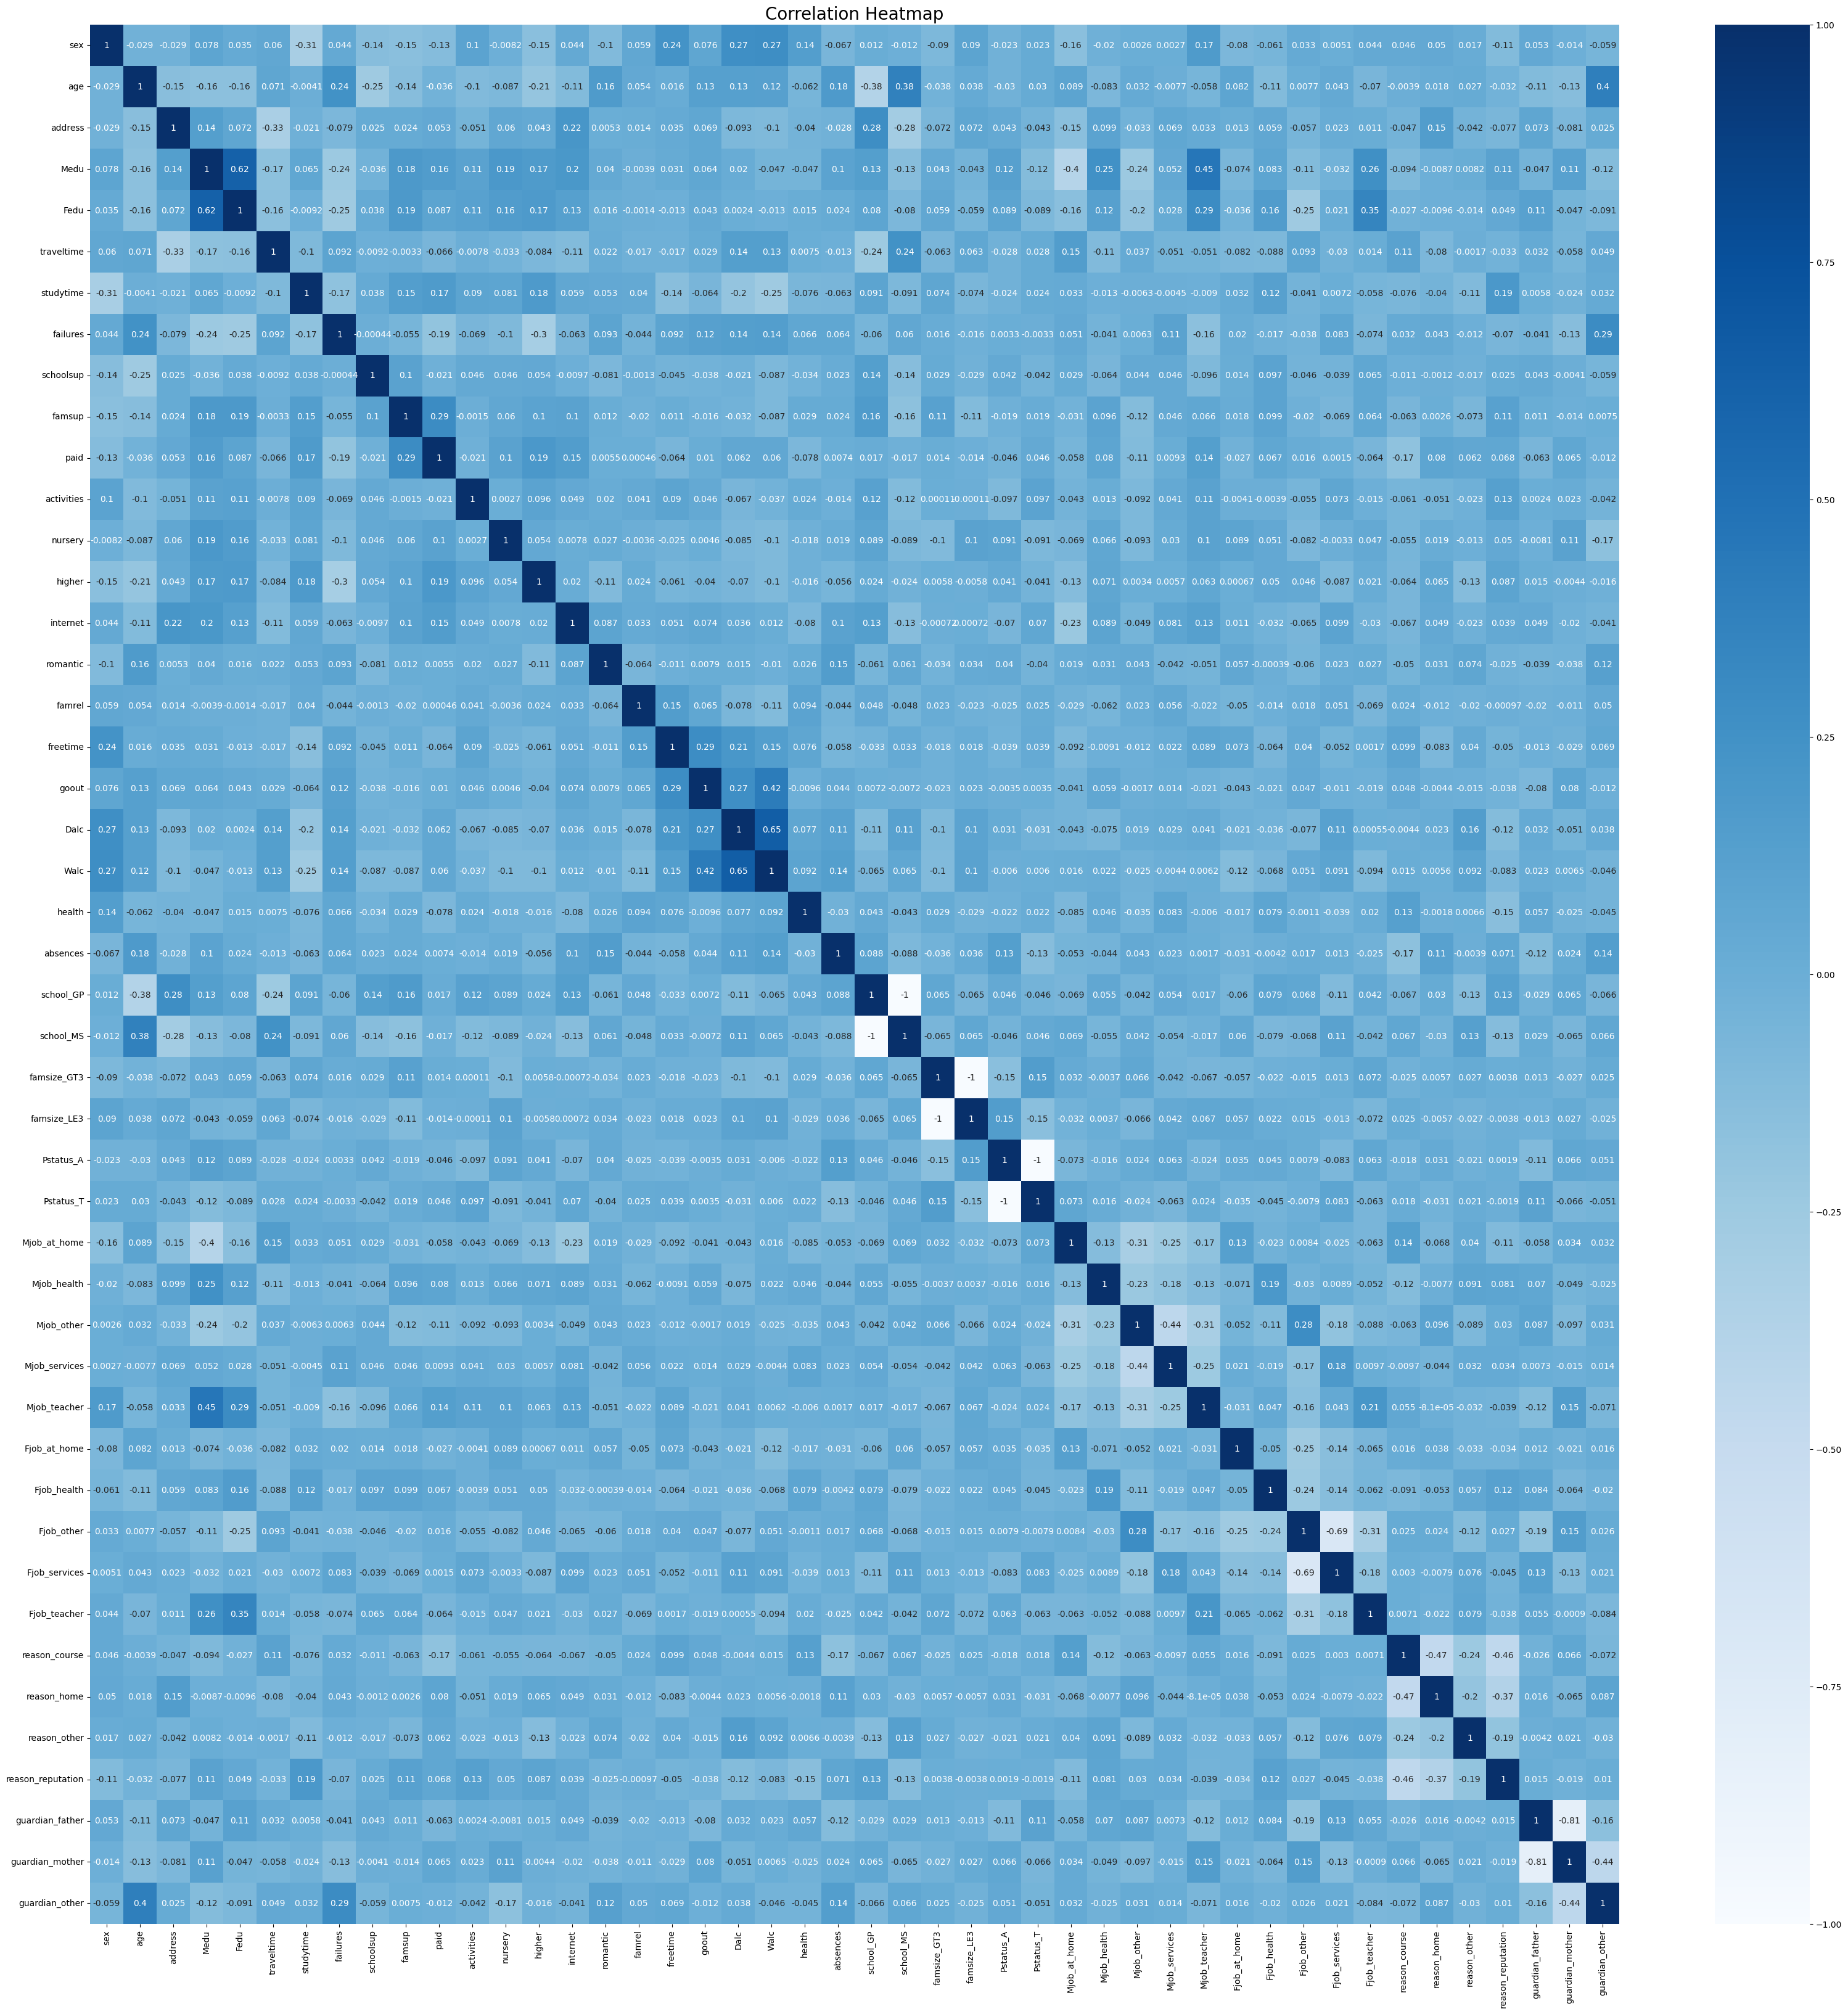

In [21]:
# See correlation b/n variables
corr = student_df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr, annot = True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

In [22]:
# plt.figure(figsize=(8, 12))
# heatmap = sns.heatmap(student_df.corr()['passed'].sort_values(by='passed', ascneding=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation to whether student passed')

In [23]:
# Finding the numeric features
num_features = student_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_features)
student_df['passed'].head()

['sex', 'age', 'address', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_GP', 'school_MS', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other']


0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

Perform Lasso to find out important features. Take points from correlation heatmap above

Search on elastic net for feature extraction

## 3\. Model Building

In [24]:
X = student_df.drop('passed', axis=1)
y = student_df['passed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
svc = SVC()

param_grid = {'C':[0.1, 0.01, 0.05, 0.001, 0.005, 0.0001, 2, 40],
              'kernel':['linear', 'poly'],
              'degree':[2, 3, 4, 5],
              'gamma':[0.000001,0.00001,0.01,1,2,3,5,20,70],
              }

gs_svc = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
gs_svc.fit(X_train, y_train)
gs_svc.best_params_
print(gs_svc.best_params_)

# Find best model score
gs_svc.score(X_train, y_train)

{'C': 0.01, 'degree': 2, 'gamma': 1e-06, 'kernel': 'linear'}


0.7056962025316456

In [1]:
!pip3 install streamlit

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 286.6 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 763.4 kB/s eta 0:00:001m856.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 1.0 MB/s eta 0:00:000:00:010:00:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 925.4 kB/s eta 0:00:0031m1.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 382.6 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 KB 3.8 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 688.8 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 187.0 kB/s eta 0:00:00m eta 0:00:010:00:06
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 KB 950.2 kB/s et

In [ ]:
!pip in

In [28]:
# Making predictions
y_pred = gs_svc.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.7341772151898734


              precision    recall  f1-score   support

          no       0.75      0.24      0.36        25
         yes       0.73      0.96      0.83        54

    accuracy                           0.73        79
   macro avg       0.74      0.60      0.60        79
weighted avg       0.74      0.73      0.68        79

